In [14]:
import laspy
import numpy as np
import scipy
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import path
import seaborn as sns
sns.set()

In [3]:
with laspy.open("F:/Data/Lidar/1_20170601.laz") as lidar:
    las = lidar.read()

In [11]:
#las.write("F:/Data/Lidar/new/sample.las")

In [15]:
las.header.point_count

4816390

In [16]:
las.classification == 1

array([ True,  True,  True, ...,  True,  True,  True])

In [17]:
las.classification == 2

array([False, False, False, ..., False, False, False])

In [18]:
las

<LasData(1.2, point fmt: <PointFormat(1, 0 bytes of extra dims)>, 4816390 points, 1 vlrs)>

In [19]:
unclassified = las[las.classification == 1]

In [95]:
lastquarter = unclassified[int(len(unclassified)/4):]

In [96]:
len(lastquarter)

3345120

In [21]:
las.intensity

array([23, 29, 30, ..., 82, 72, 89], dtype=uint16)

In [22]:
unclassified.intensity

array([23, 29, 30, ..., 82, 72, 89], dtype=uint16)

In [23]:
len(unclassified)

4460160

In [24]:
len(las)

4816390

In [25]:
unclassified.header.point_count

4460160

In [26]:
ground = las[las.classification == 2]

In [27]:
ground.z

<ScaledArrayView([ -1.22  -1.31  -1.21 ... 215.19 215.23 216.56])>

In [28]:
xyzdataset = np.vstack([ground.x,ground.y,ground.z]).transpose()

In [29]:
xyzdataset.shape

(356230, 3)

In [30]:
dataset_normal = preprocessing.normalize(xyzdataset)

In [146]:
ucx = np.array(unclassified.x)
ucy = np.array(unclassified.y)
ucz = np.array(unclassified.z)
uci = np.array(unclassified.intensity)
uc_array = np.vstack((ucx,ucy,ucz,uci)).T

In [147]:
uc_array.shape

(4460160, 4)

In [37]:
nbr = NearestNeighbors(n_neighbors=2)
nbrs = nbr.fit(uc_array)
distances,indices = nbrs.kneighbors(uc_array)
distances = np.sort(distances,axis=0)
distances = distances[:,1]
plt.plot(distances)

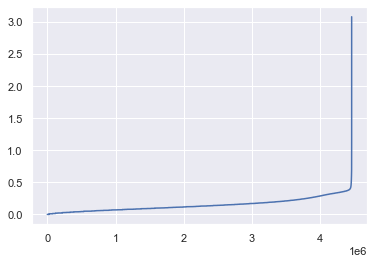

In [212]:
uc_clusters = DBSCAN(eps=0.4,min_samples=15,leaf_size=10).fit(uc_array)

In [213]:
print("Number of clusters:" + str(len(np.unique(uc_clusters.labels_))))

Number of clusters:13353


In [214]:
print("Points clustered: " + str(len([i for i in uc_clusters.labels_ if i != -1])))

Points clustered: 985791


In [191]:
len(uc_clusters.labels_)

4460160

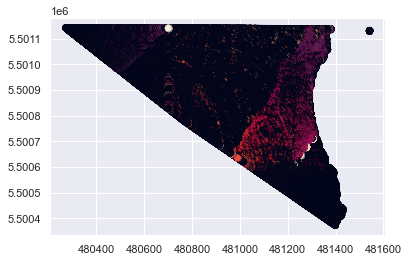

In [215]:
plt.scatter(ucx,ucy, c=uc_clusters.labels_.astype(float))

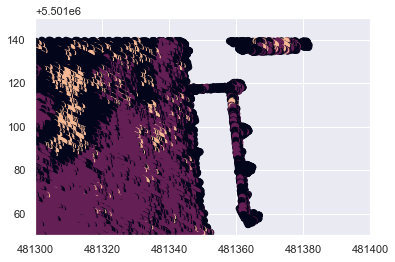

In [216]:
plt.xlim(481300,481400)
plt.ylim(5501050,5501150)
plt.scatter(ucx,ucy, c=uc_clusters.labels_.astype(float))
plt.show()

## GROUND

In [121]:
groundx = np.array(ground.x)
groundy = np.array(ground.y)
groundz = np.array(ground.z)
groundi = np.array(ground.intensity)
gnd_array = np.vstack((groundx,groundy,groundz,groundi)).T

In [122]:
gnd_array.shape

(356230, 4)

In [ ]:
nbr = NearestNeighbors(n_neighbors=2)
nbrs = nbr.fit(gnd_array)
distances,indices = nbrs.kneighbors(gnd_array)
distances = np.sort(distances,axis=0)
distances = distances[:,1]
plt.plot(distances)

In [123]:
gnd_clusters = DBSCAN(eps=2,min_samples=10).fit(gnd_array)

In [124]:
len(np.unique(gnd_clusters.labels_))

91

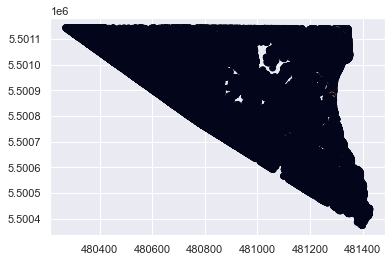

In [125]:
plt.scatter(groundx,groundy, c=gnd_clusters.labels_.astype(float))

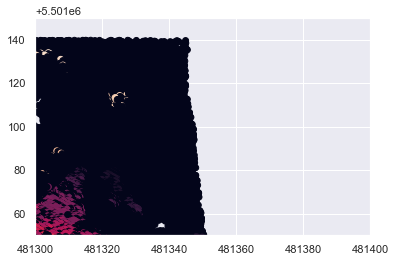

In [126]:
plt.xlim(481300,481400)
plt.ylim(5501050,5501150)
plt.scatter(groundx,groundy, c=gnd_clusters.labels_.astype(float))
plt.show()

(0.0, 1.0)

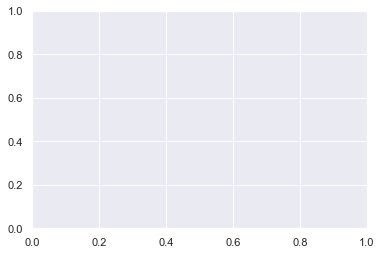